In [28]:
import os
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
import shutil
from tensorflow.keras import models, layers

In [2]:
import zipfile
# Unzip the archive
local_zip = 'Capstone.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [20]:
dataset_dir = os.path.join('Capstone')
classes = ['Pants', 'Skirt', 'Shirt', 'Blazer', 'Tshirt', 'Jacket', 'Short', 'Dress', 'Top']
training_percentage = 0.9
training_dataset_dir = 'training'
validation_dataset_dir = 'validation'

# Membuat direktori untuk training dan validation jika belum ada
os.makedirs(training_dataset_dir, exist_ok=True)
os.makedirs(validation_dataset_dir, exist_ok=True)

for dirname in classes:
    classpath = os.path.join(dataset_dir, dirname)
    training_classpath = os.path.join(training_dataset_dir, dirname)
    validation_classpath = os.path.join(validation_dataset_dir, dirname)
    
    # Membuat direktori untuk masing-masing kelas jika belum ada
    os.makedirs(training_classpath, exist_ok=True)
    os.makedirs(validation_classpath, exist_ok=True)
    
    # Mendapatkan daftar file dalam direktori kelas
    file_list = os.listdir(classpath)
    training_length = int(training_percentage * len(file_list))
    
    counter = 0
    for filename in file_list:
        filepath = os.path.join(classpath, filename)
        if counter < training_length:
            shutil.move(filepath, training_classpath)
        else:
            shutil.move(filepath, validation_classpath)
        counter += 1

In [21]:
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator (
    rescale = 1./255,
    zoom_range = 0.25,
    horizontal_flip = True,
    vertical_flip = True
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator (
    rescale = 1./255
)

In [22]:
training_generator = training_datagen.flow_from_directory(
    training_dataset_dir,
    target_size = (150, 150),
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_dir,
    target_size = (150, 150),
    class_mode = 'categorical'
)

Found 3070 images belonging to 9 classes.
Found 347 images belonging to 9 classes.


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 17, 17, 128)      

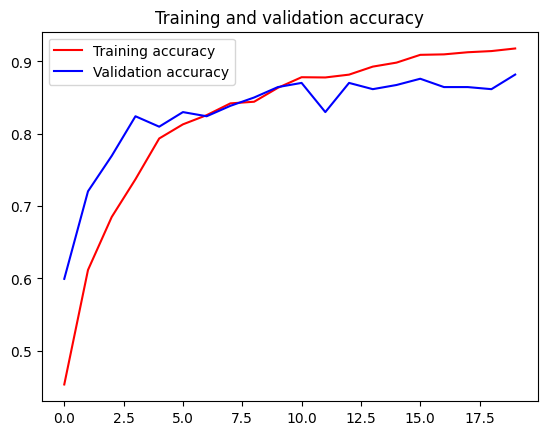

<Figure size 640x480 with 0 Axes>

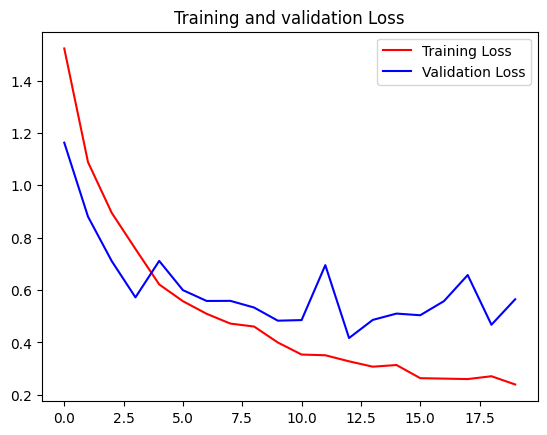

<Figure size 640x480 with 0 Axes>

In [31]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])
model.summary()
# Mengkompilasi Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih Model
history = model.fit(
    training_generator,
    steps_per_epoch=len(training_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Menyimpan Model
model.save('fashion_classifier_model.h5')

# Plot hasil pelatihan jika diperlukan

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()